In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [48]:
traindf_orig = pd.read_csv('train.csv')
testdf_orig = pd.read_csv('test.csv')

print (traindf_orig.shape)
print (testdf_orig.shape)

(371, 7)
(529, 6)


In [49]:
# columns in the training and testing data

print ('Columns in the training data:')
print (traindf_orig.columns)

print ('\nColumns in the testing data:')
print (testdf_orig.columns)

Columns in the training data:
Index(['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color', 'type'],
      dtype='object')

Columns in the testing data:
Index(['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color'],
      dtype='object')


In [50]:
traindf.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [51]:
traindf.tail()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
366,0.458132,0.391760,0.660590,0.635689,blue,Goblin
367,0.331936,0.564836,0.539216,0.551471,green,Ghost
368,0.481640,0.501147,0.496446,0.544003,clear,Ghoul
369,0.294943,0.771286,0.583503,0.300618,clear,Ghost
370,0.670200,0.768469,0.737274,0.608384,white,Ghoul


In [52]:
traindf.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


In [53]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), object(2)
memory usage: 17.5+ KB


In [54]:
# dropping the 'id' column from both the traindf and the testdf dataframes

traindf = traindf_orig.drop(['id'], axis = 1)
testdf = testdf_orig.drop(['id'], axis = 1)

In [55]:
testdf.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.471774,0.387937,0.706087,0.698537,black
1,0.427332,0.645024,0.565558,0.451462,white
2,0.549602,0.491931,0.660387,0.449809,black
3,0.638095,0.682867,0.471409,0.356924,white
4,0.361762,0.583997,0.377256,0.276364,black


In [56]:
testdf.tail()

,bone_length,rotting_flesh,hair_length,has_soul,color
524,0.377573,0.390158,0.696465,0.355373,blue
525,0.229161,0.601265,0.191282,0.475115,clear
526,0.510497,0.498347,0.708020,0.714154,white
527,0.331472,0.765835,0.338207,0.193431,clear
528,0.256789,0.691802,0.415197,0.348971,white


In [57]:
testdf.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,529.000000,529.000000,529.000000,529.000000
mean,0.425474,0.503637,0.517288,0.464096
std,0.136079,0.158552,0.171727,0.179659
min,0.000000,0.000000,0.000000,0.000000
25%,0.329383,0.393987,0.388189,0.338964
50%,0.421989,0.510065,0.520220,0.461294
75%,0.519024,0.605957,0.644824,0.584448
max,1.000000,1.000000,0.999841,1.000000


In [58]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 5 columns):
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), object(1)
memory usage: 20.7+ KB


In [59]:
print (np.sort(traindf['color'].unique()))
print (np.sort(testdf['color'].unique()))

['black' 'blood' 'blue' 'clear' 'green' 'white']
['black' 'blood' 'blue' 'clear' 'green' 'white']


In [60]:
print (np.sort(traindf['type'].unique()))

['Ghost' 'Ghoul' 'Goblin']


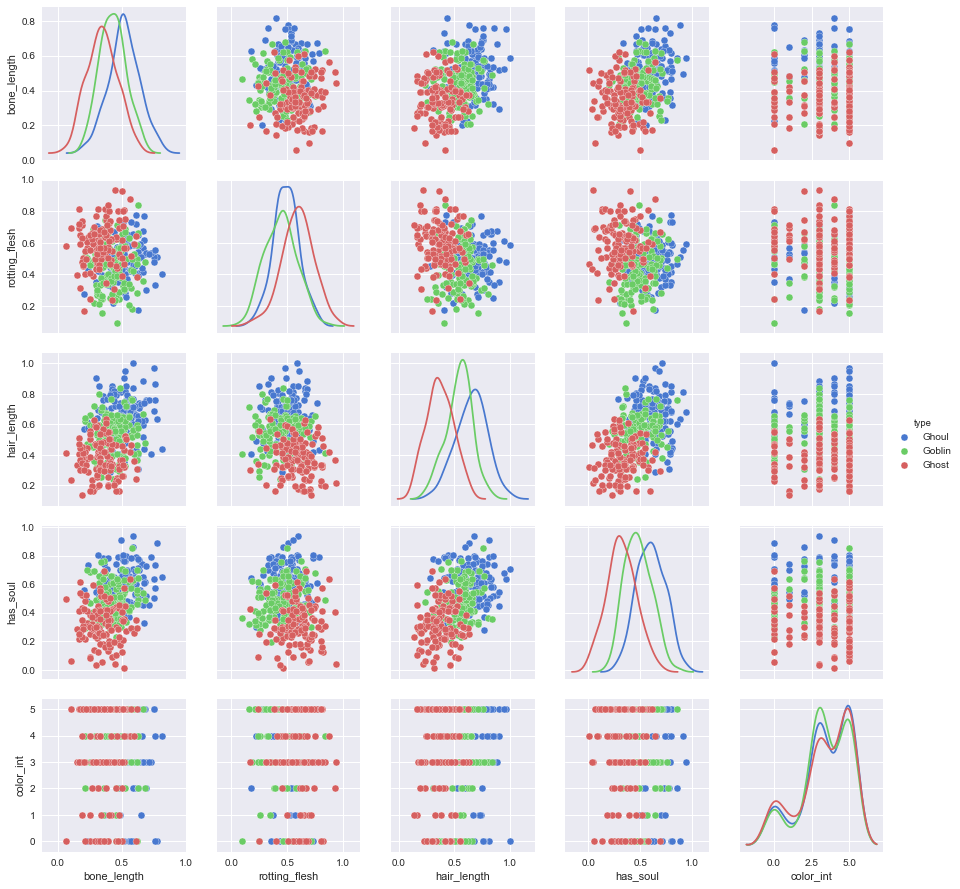

In [61]:
# using LabelEncoder for the 'color' feature

color_le = preprocessing.LabelEncoder()
color_le.fit(traindf['color'])
traindf['color_int'] = color_le.transform(traindf['color'])

_ = sns.pairplot(traindf.drop('color', axis = 1), hue = 'type', palette = 'muted', diag_kind = 'kde')
traindf.drop('color_int', axis = 1, inplace = True)

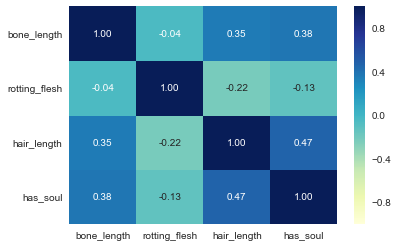

In [62]:
# showing the correlation between each of the features via a heatmap

_ = sns.heatmap(traindf.corr(), annot = True, fmt = ".2f", cmap = 'YlGnBu')

C:\Users\Rahul\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


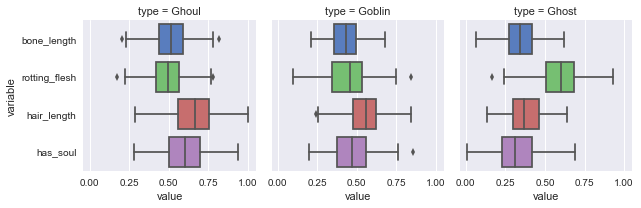

In [63]:
g = sns.FacetGrid(pd.melt(traindf, id_vars = 'type', value_vars = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']), col = 'type')
g = g.map(sns.boxplot, 'value', 'variable', palette = 'muted')

In [64]:
# The following DecisionTreeClassifier will serve as a base classifier for comparing the accuracy with other future models

df = pd.get_dummies(traindf.drop('type', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(df, traindf['type'], test_size = 0.25, random_state = 42)

dt_clf = DecisionTreeClassifier(random_state = 0)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

print (metrics.classification_report(y_test, y_pred))
print ('\nAccuracy score is: '+str(metrics.accuracy_score(y_test, y_pred)))

             precision    recall  f1-score   support

      Ghost       0.77      0.65      0.70        31
      Ghoul       0.79      0.75      0.77        36
     Goblin       0.52      0.65      0.58        26

avg / total       0.71      0.69      0.69        93


Accuracy score is: 0.688172043011


In [65]:
accuracy_scorer = metrics.make_scorer(metrics.accuracy_score)

In [66]:
# Getting the train and the test data-sets

X_train = pd.get_dummies(traindf.drop('type', axis = 1))
y_train = traindf['type']
X_test = pd.get_dummies(testdf)

In [67]:
# Using GridSearchCV for the RandomForestClassifier with cv = 5

params = {'n_estimators' : [10, 20, 50, 100], 'criterion' : ['gini', 'entropy'], 
          'max_depth' : [None, 1, 2, 3, 5]}
rf = RandomForestClassifier(random_state = 0)
clf = GridSearchCV(rf, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

Best score : 0.7035040431266847
Best parameters : {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}


In [68]:
# Using GridSearchCV for the RandomForestClassifier with cv = 10

params = {'n_estimators' : [10, 20, 50, 100], 'criterion' : ['gini', 'entropy'], 
          'max_depth' : [None, 1, 2, 3, 5]}
rf = RandomForestClassifier(random_state = 0)
clf = GridSearchCV(rf, param_grid = params, scoring = accuracy_scorer, cv = 10, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

Best score : 0.706199460916442
Best parameters : {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}


In [69]:
# Using GridSearchCV for the BaggingClassifier with cv = 5

params = {'n_estimators' : [10, 20, 50, 100], 'max_samples' : [1, 3, 5, 10]}
bag = BaggingClassifier(random_state = 0)
clf = GridSearchCV(bag, param_grid = params, scoring = accuracy_scorer,
                   cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

bag_best = BaggingClassifier(max_samples = 5, n_estimators = 20, random_state = 0)

Best score : 0.7088948787061995
Best parameters : {'max_samples': 10, 'n_estimators': 50}


In [70]:
# Using GridSearchCV for the BaggingClassifier with cv = 10

params = {'n_estimators' : [10, 20, 50, 100], 'max_samples' : [1, 3, 5, 10]}
bag = BaggingClassifier(random_state = 0)
clf = GridSearchCV(bag, param_grid = params, scoring = accuracy_scorer,
                   cv = 10, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

bag_best = BaggingClassifier(max_samples = 5, n_estimators = 20, random_state = 0)

Best score : 0.7304582210242587
Best parameters : {'max_samples': 10, 'n_estimators': 100}


In [71]:
# Using GridSearchCV for the GradientBoostingClassifier with cv = 5

params = {'learning_rate' : [0.05, 0.07, 0.1, 0.3, 0.5], 'n_estimators' : [10, 20, 50, 100, 200], 
          'max_depth' : [1, 2, 3, 5]}
gbc = GradientBoostingClassifier(random_state = 0)
clf = GridSearchCV(gbc, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

Best score : 0.7412398921832885
Best parameters : {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 10}


In [72]:
# Using GridSearchCV for the GradientBoostingClassifier with cv = 10

params = {'learning_rate' : [0.05, 0.07, 0.1, 0.3, 0.5], 'n_estimators' : [10, 20, 50, 100, 200], 
          'max_depth' : [1, 2, 3, 5]}
gbc = GradientBoostingClassifier(random_state = 0)
clf = GridSearchCV(gbc, param_grid = params, scoring = accuracy_scorer, cv = 10, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

Best score : 0.7358490566037735
Best parameters : {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 20}


In [73]:
from sklearn.neighbors import KNeighborsClassifier

# Using GridSearchCV for the KNN classifier with CV = 5

params = {'n_neighbors' : [3, 5, 10, 20], 'leaf_size' : [10, 20, 30, 50], 'p' : [1, 2, 5], 
          'weights' : ['uniform', 'distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

Best score : 0.6684636118598383
Best parameters : {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [74]:
# Using GridSearchCV for the KNN classifier with CV = 10

params = {'n_neighbors' : [3, 5, 10, 20], 'leaf_size' : [10, 20, 30, 50], 'p' : [1, 2, 5], 
          'weights' : ['uniform', 'distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid = params, scoring = accuracy_scorer, cv = 10, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

Best score : 0.7088948787061995
Best parameters : {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 20, 'p': 5, 'weights': 'uniform'}


In [75]:
# Using GridSearchCV for LogisticRegression with CV = 5

params = {'penalty' : ['l1', 'l2'], 'C' : [1, 2, 3, 5, 10]}
lr = LogisticRegression(random_state = 0)
clf = GridSearchCV(lr, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best Score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

Best Score : 0.7304582210242587
Best parameters : {'C': 10, 'penalty': 'l1'}


In [76]:
# Using GridSearchCV for LogisticRegression with CV = 10

params = {'penalty' : ['l1', 'l2'], 'C' : [1, 2, 3, 5, 10]}
lr = LogisticRegression(random_state = 0)
clf = GridSearchCV(lr, param_grid = params, scoring = accuracy_scorer, cv = 10, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best Score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

Best Score : 0.7331536388140162
Best parameters : {'C': 1, 'penalty': 'l1'}


In [77]:
# Using GridSearchCV for SVC with CV = 5

params = {'kernel' : ['linear', 'rbf'], 'C' : [1, 3, 5, 10], 'degree' : [3, 5, 10]}
svc = SVC(probability = True, random_state = 0)
clf = GridSearchCV(svc, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

Best score : 0.7250673854447439
Best parameters : {'C': 5, 'degree': 3, 'kernel': 'linear'}


In [78]:
# Using GridSearchCV for SVC with CV = 10

params = {'kernel' : ['linear', 'rbf'], 'C' : [1, 3, 5, 10], 'degree' : [3, 5, 10]}
svc = SVC(probability = True, random_state = 0)
clf = GridSearchCV(svc, param_grid = params, scoring = accuracy_scorer, cv = 10, n_jobs = -1)
clf.fit(X_train, y_train)
print ('Best score : {}'.format(clf.best_score_))
print ('Best parameters : {}'.format(clf.best_params_))

Best score : 0.738544474393531
Best parameters : {'C': 10, 'degree': 3, 'kernel': 'linear'}


In [79]:
rf_best = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 3, random_state = 0)
bag_best = BaggingClassifier(max_samples = 10, n_estimators = 100, random_state = 0)
gbc_best = GradientBoostingClassifier(n_estimators = 20, max_depth = 1, learning_rate = 0.1, random_state = 0)
lr_best = LogisticRegression(C = 10, penalty = 'l1')
svc_best = SVC(C = 5, degree = 3, kernel = 'linear')

In [80]:
# Using VotingClassifier

voting_clf = VotingClassifier(estimators = [('rf', rf_best), ('bag', bag_best), ('gbc', gbc_best), ('lr', lr_best), ('svc', svc_best)], voting = 'hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print ('\nAccuracy score for VotingClassifier is : '+str(voting_clf.score(X_train, y_train)))


Accuracy score for VotingClassifier is : 0.77358490566


In [81]:
submission = pd.DataFrame({'id' : testdf_orig['id'], 'type' : y_pred})
submission.to_csv('s1.csv', index = False)